# Departamento de Marketing -  Clusterização

![](imagen-planificar-tu-estrategia-de-Email-Marketing.png)

Kaggle: https://www.kaggle.com/arjunbhasin2013/ccdata

## Contexto

A segmentação do público-alvo de uma campanha é essencial para sua efetividade. Se entregue para as pessoas certas, um anúncio tem maior chance de gerar conversão, menor custo de aquisição de cliente e maior retorno do investimento. Para  fazer isso, é preciso estudar os dados de comportamento do consumidor ou potencial cliente da marca e separá-los em clusters, ou seja, grupos.

## Objetivo

O departamento de Marketing de uma empresa de cartões de crédito precisa conhecer melhor os grupos de clientes que a empresa possui para ajudar a criar estratégias diferenciadas da concorrência para cada cluster definido, com objetivos e caminhos diferentes.

Foi disponibilizado um dataset com uma série de dados dos clientes e nos foi pedido para fazer a identificação do público em questão, partindo do mapeamento e separação por padrões.

### Features

- **CUST_ID**: Identificação dos clientes
- **BALANCE**: Saldo na conta
- **BALANCE_FREQUENCY**: Frequência que o saldo é atualizado
    * 0 - Não frequente
    * 1 - Frequente
- **PURCHASES**: Valor de compras realizadas
- **ONEOFF_PURCHASES**: Valor de compras feitas à vista
- **INSTALLMENTS_PURCHASES**: Quantidade de compras parceladas
- **CASH_ADVANCE**: Dinheiro adiantado
- **PURCHASES_FREQUENCY**: Frequência das compras entre 0 e 1
- **ONEOFF_PURCHASES_FREQUENCY**: Frequência de compras à vista entre 0 e 1
- **PURCHASES_INSTALLMENTS_FREQUENCY**: Frequência de compras parceladas entre 0 e 1
- **CASH_ADVANCE_FREQUENCY**: Frequência de saques de dinheiro adiantado entre 0 e 1
- **CASH_ADVANCE_TRX**: Número de transações feitas com o dinheiro adiantado
- **PURCHASES_TRX**: Número de compras
- **CREDIT_LIMIT**: Limite do cartão de crédito
- **PAYMENTS**: Valor pago
- **MINIMUM_PAYMENTS**: Valor mínimo gasto
- **PRC_FULL_PAYMENT**: Percentual de pagamentos da fatura completa
- **TENURE**: Anos de posse do titular do cartão

## Importando os dados

In [1]:
# Importanto primeiras bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_df= pd.read_csv('Marketing_data.csv')
raw_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
print('O dataset possui {} linhas.'.format(raw_df.shape[0]))
print('O dataset possui {} colunas.'.format(raw_df.shape[1]))

O dataset possui 8950 linhas.
O dataset possui 18 colunas.


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# Observamos que duas colunas possuem valores nulos

raw_df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
raw_df.describe().round(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8949.00,8950.00,8637.00,8950.00,8950.00
mean,1564.47,0.88,1003.20,592.44,411.07,978.87,0.49,0.20,0.36,0.14,3.25,14.71,4494.45,1733.14,864.21,0.15,11.52
std,2081.53,0.24,2136.63,1659.89,904.34,2097.16,0.40,0.30,0.40,0.20,6.82,24.86,3638.82,2895.06,2372.45,0.29,1.34
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.00,0.00,0.02,0.00,6.00
25%,128.28,0.89,39.64,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.00,1.00,1600.00,383.28,169.12,0.00,12.00
50%,873.39,1.00,361.28,38.00,89.00,0.00,0.50,0.08,0.17,0.00,0.00,7.00,3000.00,856.90,312.34,0.00,12.00
75%,2054.14,1.00,1110.13,577.41,468.64,1113.82,0.92,0.30,0.75,0.22,4.00,17.00,6500.00,1901.13,825.49,0.14,12.00
max,19043.14,1.00,49039.57,40761.25,22500.00,47137.21,1.00,1.00,1.00,1.50,123.00,358.00,30000.00,50721.48,76406.21,1.00,12.00


In [7]:
# Conhecer os valores únicos de cada feature
for i in raw_df.columns:
    print(i)
    print(raw_df[i].dtype)
    print('Os valores únicos são:', raw_df[i].unique())
    print('-'*100)

CUST_ID
object
Os valores únicos são: ['C10001' 'C10002' 'C10003' ... 'C19188' 'C19189' 'C19190']
----------------------------------------------------------------------------------------------------
BALANCE
float64
Os valores únicos são: [  40.900749 3202.467416 2495.148862 ...   23.398673   13.457564
  372.708075]
----------------------------------------------------------------------------------------------------
BALANCE_FREQUENCY
float64
Os valores únicos são: [0.818182 0.909091 1.       0.636364 0.545455 0.875    0.454545 0.727273
 0.5      0.888889 0.090909 0.272727 0.363636 0.       0.666667 0.75
 0.857143 0.181818 0.333333 0.6      0.3      0.125    0.9      0.833333
 0.8      0.2      0.777778 0.555556 0.25     0.142857 0.571429 0.4
 0.444444 0.714286 0.222222 0.1      0.625    0.428571 0.111111 0.285714
 0.7      0.375    0.166667]
----------------------------------------------------------------------------------------------------
PURCHASES
float64
Os valores únicos são: [  95.

In [8]:
# Alguns dados possuem a frequência de saques de dinheiro adiantado[CASH_ADVANCE_FREQUENCY] maior que 1(que é o máximo).
# Vamos analisá-los para definir o melhor valor a se botar.

raw_df[raw_df['CASH_ADVANCE_FREQUENCY'] > 1]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
681,C10708,5656.069801,1.000000,362.36,362.36,0.0,7240.433194,0.250000,0.250000,0.0,1.250000,12,2,8000.0,683.421497,2036.877611,0.0,8
1626,C11680,2876.009336,1.000000,152.61,152.61,0.0,3719.650168,0.333333,0.333333,0.0,1.166667,24,2,4000.0,248.342971,584.926336,0.0,6
2555,C12629,5906.184924,1.000000,141.80,141.80,0.0,1651.286918,0.125000,0.125000,0.0,1.125000,12,2,10000.0,933.969974,919.289675,0.0,8
2608,C12684,7801.511533,1.000000,231.40,231.40,0.0,4109.465221,0.100000,0.100000,0.0,1.100000,20,3,13500.0,1593.617739,1522.496755,0.0,10
3038,C13127,3846.742530,1.000000,0.00,0.00,0.0,1932.460679,0.000000,0.000000,0.0,1.500000,18,0,5600.0,496.245836,538.346874,0.0,6
3253,C13347,5709.486507,0.833333,0.00,0.00,0.0,2794.326341,0.000000,0.000000,0.0,1.166667,10,0,6000.0,550.513331,1299.463370,0.0,6
8055,C18273,1917.895730,1.000000,285.07,285.07,0.0,6084.858872,0.363636,0.363636,0.0,1.090909,28,6,3000.0,5692.682993,556.449635,0.0,11
8365,C18588,3857.562230,1.000000,0.00,0.00,0.0,2127.213754,0.000000,0.000000,0.0,1.142857,26,0,5000.0,617.508991,538.396872,0.0,7


- São clientes que possuem alto saldo em conta, alto valor de dinheiro adiantado e o número de transferência com o dinheiro é alto, nos fazendo acreditar que essas pessoas sacam frequentemente o dinheiro adiantado. Então os valores maiores que 1 na feature 'CASH_ADVANCE_FREQUENCY' será substituido por 1 que é o máximo.

### Manipulação dos dados

#### Valores Nulos

- Vamos assumir que quando os valores de pagamento mínimo estiverem nulo, serão 0.

- Temos 1 valor nulo na coluna limite de crédito, então colocaremos a mediana dessa coluna.

#### Dados desnecessários para o modelo

- A coluna CUST_ID é o identificador com valor único para cada consumidor, não sendo necessário para o nosso modelo.


#### Mudando valores de colunas

- Como visto anteriormente, mudaremos o valor dos clientes que possuem CASH_ADVANCE_FREQUENCY maior que 1 para 1.

In [9]:
# Criando uma cópia do dataset original
df= raw_df.copy()

# Valores nulos
df['MINIMUM_PAYMENTS']= df['MINIMUM_PAYMENTS'].fillna(0)
df['CREDIT_LIMIT']= df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())

# Deletando coluna CUST_ID
df= df.drop(columns= ['CUST_ID'])

# Mudando o valor de CASH_ADVANCE_FREQUENCY
df['CASH_ADVANCE_FREQUENCY']= df['CASH_ADVANCE_FREQUENCY'].apply(lambda x: 1 if x > 1 else x)


df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Visualização dos dados

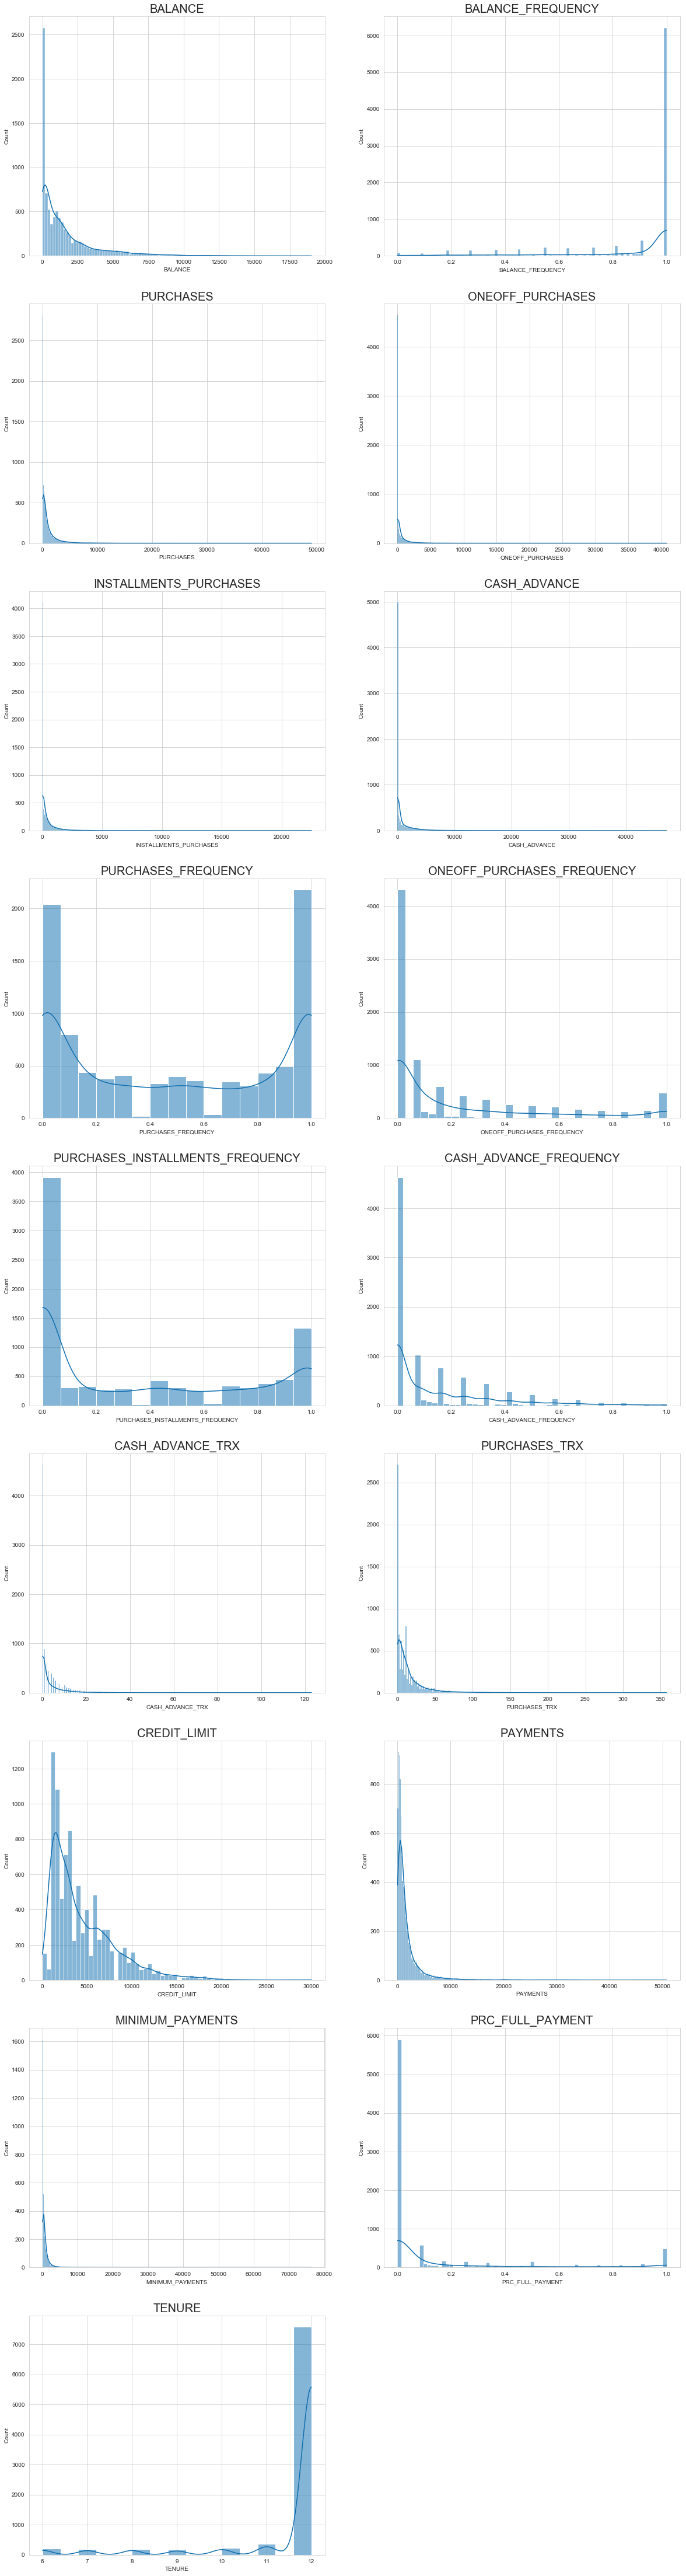

In [10]:
sns.set_style('whitegrid')
sns.set_palette('GnBu_r')

plt.figure(figsize= (20, 80))

n= 1
for i in df.columns:
    plt.subplot(9, 2, n)
    sns.histplot(x= i, data= df, kde= True)
    plt.title(i, fontsize= 20)
    n+= 1

### Insights

- A maioria do saldo dos clientes está concentrado entre 0 e 2.500 reais.
- A frequência com que os clientes mexem na conta é bem alta.
- A maioria das compra são parceladas.
- Quase a totalidade dos clientes possuem o cartão há 12 anos

Text(0.5,1,'Matriz de Correlação')

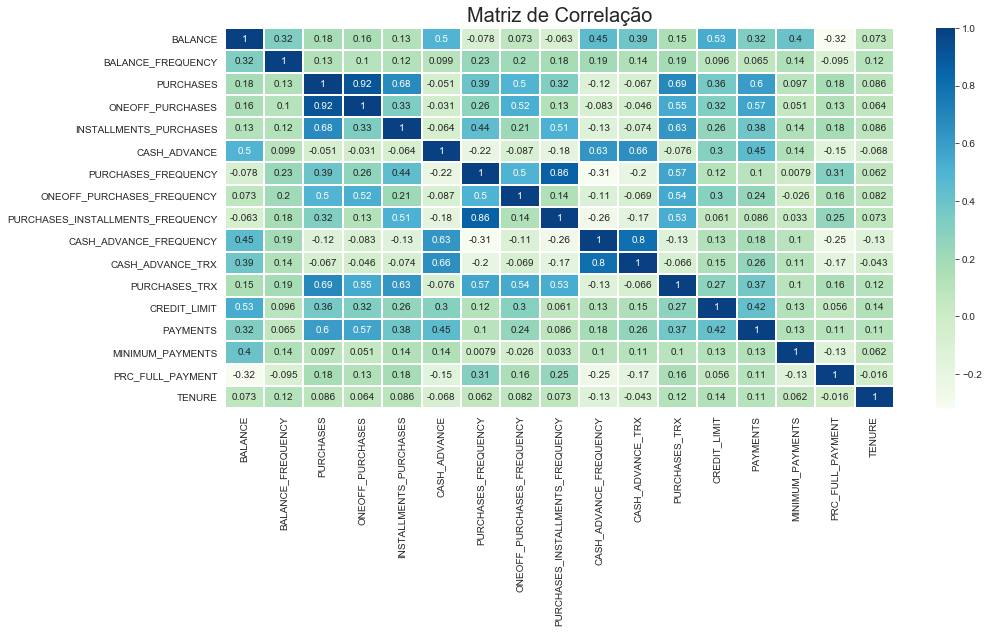

In [11]:
corr= df.corr()

plt.figure(figsize= (15, 7))

sns.heatmap(corr, annot= True, linewidths= 1, cmap= 'GnBu')
plt.title('Matriz de Correlação', fontsize= 20)

### Insights

Percebemos 3 grandes correlações entre as features:

- Entre o valor de compra e o valor de compras à vista.
- Também uma relação muito alta na frequência de compras à vista e a frequência de compras.
- E por último, a relação entre o número de transações com o dinheiro adiantado e a frequência de saques do dinheiro adiantado.

## Machine Learning - Clusterização


### Pré-processamento dos dados

#### Standard Scaler
Standard Scaler transforma os dados e os coloca na mesma escala. Padroniza as features removendo a média e escala a variância a uma unidade.

Isso significa que para cada feature, a média seria 0, e o Desvio Padrão seria 1. Desta forma, as features são padronizadas, tornando-as mais manejáveis para nossos modelos. Mais uma vez, modelos Não Baseados em Árvores de Decisão se beneficiam mais deste tipo de padronização.

Fonte: https://sigmoidal.ai/guia-basico-de-pre-processamento-de-dados/#:~:text=Standard%20Scaler&text=Na%20documenta%C3%A7%C3%A3o%2C%20eles%20explicam,mais%20manej%C3%A1veis%20para%20nossos%20modelos.

In [12]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

In [13]:
df_scaled= scaler.fit_transform(df)

df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.2973097 ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.10204243,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.08848934,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32175099,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33316552,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.31923775,
        -0.52555097, -4.12276757]])

### KMeans

O K-means é um algoritmo do tipo não supervisionado, ou seja, que não trabalha com dados rotulados.

O objetivo desse algoritmo é encontrar similaridades entre os dados e agrupá-los conforme o número de cluster passado pelo argumento k.

Uma dúvida comum é quanto a escolha do número de clusters que precisamos dividir os nossos dados. É de extrema importância a correta escolha do número de cluster para a viabilidade do projeto.

Diante disso existem diversos métodos para tentar encontrar o número ótimo para o valor de k:

### Elbow Point (Método do cotovelo)

Ele usa a soma das distâncias quadradas (SSE) entre os pontos de dados e seus respectivos centróides ou médias de cluster atribuídos. Em seguida, selecione o valor k na posição em que o SSE começa a achatar e formar um cotovelo.

É assim que o método ajuda a encontrar bons valores de k (o número de clusters em um conjunto de dados) e a criar bons clusters para um determinado conjunto de dados.


Fonte: 


- https://minerandodados.com.br/entenda-o-algoritmo-k-means/#:~:text=de%20dados%20real.-,Como%20funciona%20o%20K%2Dmeans%3F,n%C3%A3o%20trabalha%20com%20dados%20rotulados.&text=O%20algoritmo%20de%20forma%20iterativa,dados%20que%20seja%20mais%20similar.

In [14]:
from sklearn.cluster import KMeans

In [15]:
# Deiniremos uma função para o modelo do método do cotovelo achando a inertia de cada grupo
# A inertia pode ser reconhecida como uma medida de quão internamente os clusters são coerentes

def kmeans(numero_clusters, dados):
    modelo= KMeans(n_clusters= numero_clusters)
    modelo.fit(dados)
    return [numero_clusters, modelo.inertia_]

In [16]:
inertia= [kmeans(numero_clusters, df_scaled) for numero_clusters in range(1, 20)]

inertia= pd.DataFrame(inertia, columns= ['grupos', 'inertia'])
inertia.head()

,grupos,inertia
0,1,152150.000000
1,2,127780.476085
2,3,111950.474774
3,4,99044.159859
4,5,91474.609548


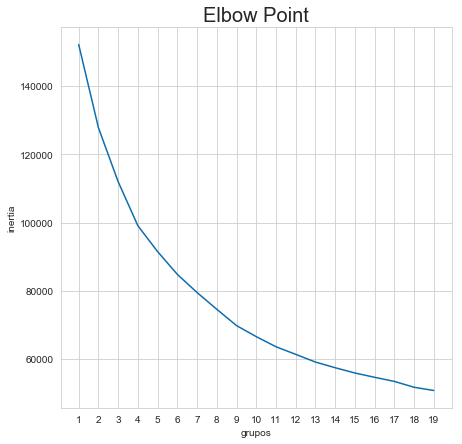

In [17]:
plt.figure(figsize= (7, 7))

sns.lineplot(x= 'grupos', y= 'inertia', data= inertia)
plt.xticks(inertia.grupos)
plt.title('Elbow Point', fontsize= 20)

plt.show()

- O melhor número de clusters parece estar entre 7 e 13 de acordo com o método do cotovelo.

### Qualidade dos grupos

Para mensurar o quão bom é um agrupamento, devemos utilizar métricas de qualidade de agrupamento.

Os algoritmos de agrupamento não fazem uso de classes ou alvos, ou seja, em aplicações reais, na maioria das vezes, não é possível saber se o agrupamento gerado está completamente certo ou não. Não existe um algoritmo genérico que resolva todos os nossos problemas nesse contexto, portanto temos que nos ater às aferições estatísticas a fim de determinar se um determinado agrupamento atende as necessidades do problema.


#### Coeficiente de Silhouette

O coeficiente Silhouette é definido para cada amostra e é composto por duas pontuações, e uma pontuação mais alta do Coeficiente Silhouette se relaciona a um modelo com clusters mais bem definidos.

#### Davies-Bouldin


Esse índice significa a 'similaridade' média entre os clusters, onde a similaridade é uma medida que compara a distância entre os clusters com o tamanho dos próprios clusters. Um índice de Davies-Bouldin mais baixo está relacionado a um modelo com melhor separação entre os clusters.

#### Calinski-Harabasz

O índice Calinski-Harabasz, também conhecido como Critério da Razão de Variância, é a razão da soma da dispersão entre os clusters e da dispersão entre os clusters para todos os clusters. Quanto maior a pontuação, melhores são os desempenhos.


Fontes: 
- https://pt.0xzx.com/2020012275942.html
- https://medium.com/@haataa/how-to-measure-clustering-performances-when-there-are-no-ground-truth-db027e9a871c

In [18]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [19]:
# Criando uma função de validação para achar qualidade das clusterizações
def validacao(numero_clusters, dados):
    modelo= KMeans(n_clusters= numero_clusters)
    labels= modelo.fit_predict(dados)
    s= silhouette_score(df_scaled, labels)
    db= davies_bouldin_score(df_scaled, labels)
    c= calinski_harabasz_score(df_scaled, labels)
    
    return [numero_clusters, s, db, c]

In [20]:
# Acharemos a qualidade da clusterização de 7 até 13 grupos
resultados= [validacao(numero_grupos, df_scaled) for numero_grupos in range(7, 14)]

resultados= pd.DataFrame(resultados, columns= ['grupos', 'silhouette', 'davies', 'calinski'])
resultados

,grupos,silhouette,davies,calinski
0,7,0.208123,1.459862,1354.640071
1,8,0.222156,1.382320,1328.904078
2,9,0.213027,1.305043,1282.313773
3,10,0.222583,1.341847,1281.222230
4,11,0.216648,1.330918,1244.136785
5,12,0.216574,1.352612,1203.687210
6,13,0.218897,1.398869,1172.311220


Text(0.5,1,'Calinski-Harabasz')

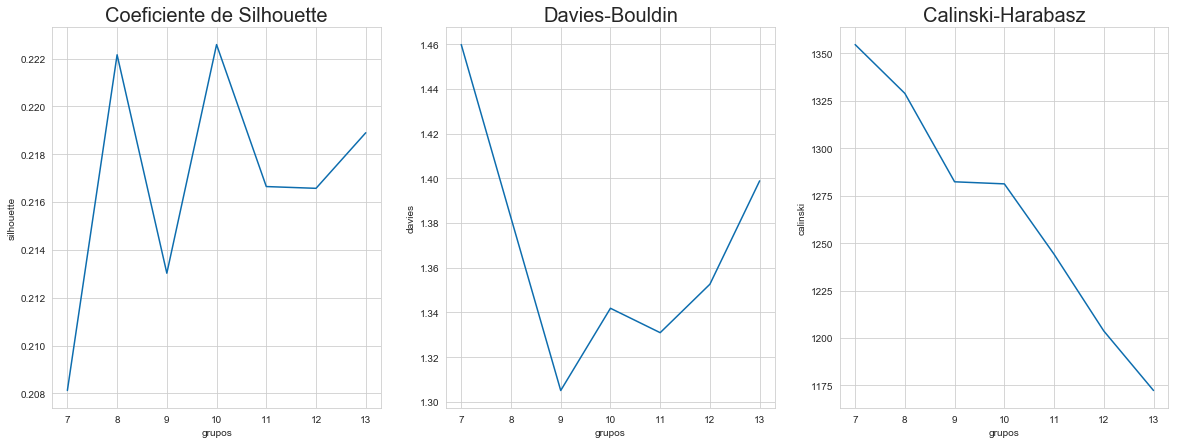

In [21]:
plt.figure(figsize= (20, 7))

plt.subplot(1, 3, 1)
sns.lineplot(x= 'grupos', y= 'silhouette', data= resultados)
plt.title('Coeficiente de Silhouette', fontsize= 20)

plt.subplot(1, 3, 2)
sns.lineplot(x= 'grupos', y= 'davies', data= resultados)
plt.title('Davies-Bouldin', fontsize= 20)

plt.subplot(1, 3, 3)
sns.lineplot(x= 'grupos', y= 'calinski', data= resultados)
plt.title('Calinski-Harabasz', fontsize= 20)

### Conclusão

O melhor número de clusters de acordo com as métricas foi 10, pois teve o maior coeficiente de Silhouette, terceiro menor número de Davies-Bouldin e um bom resultado na métrica de Calinski-Harabasz.

In [22]:
modelo= KMeans(n_clusters= 10)
modelo.fit(df_scaled)

KMeans(n_clusters=10)

In [23]:
modelo_treinado= pd.DataFrame(modelo.cluster_centers_, columns= df.columns)

modelo_treinado

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.711710,0.389648,-0.213026,-0.145898,-0.235708,2.102458,-0.480443,-0.193737,-0.423160,1.956418,2.002393,-0.262455,1.065462,0.873613,0.396889,-0.388609,0.078737
1,-0.196414,0.373785,-0.033147,-0.205293,0.298710,-0.313659,0.929777,-0.299817,1.129153,-0.379747,-0.301597,0.199296,-0.271920,-0.190123,-0.021202,-0.340754,0.282095
2,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.259170,0.061229,5.362438,3.044081,8.098975,1.130666,1.110132,0.310863
3,0.022819,0.405046,-0.370346,-0.251891,-0.412803,-0.069641,-0.905780,-0.420473,-0.791601,0.149203,-0.001289,-0.498746,-0.299584,-0.245690,-0.054551,-0.455319,0.272718
4,-0.172605,0.394602,0.438940,0.602761,-0.069567,-0.342164,0.928079,1.940282,-0.009849,-0.425695,-0.334972,0.495741,0.377041,0.072474,-0.158020,0.357191,0.262496
5,0.879000,0.472645,2.276428,1.810011,2.057406,-0.188544,1.163949,1.661197,1.213153,-0.293721,-0.202996,2.767566,1.255922,1.283086,0.281585,0.289982,0.332548
6,-0.309020,-0.355926,-0.298507,-0.215155,-0.310134,0.098376,-0.258875,-0.286711,-0.278757,0.378373,0.033993,-0.397624,-0.560448,-0.393983,-0.214959,-0.092284,-3.229571
7,-0.704316,0.059189,-0.016180,-0.253940,0.427682,-0.456305,0.881543,-0.383764,1.046467,-0.657656,-0.466371,0.101456,-0.138004,-0.221779,-0.277468,2.161153,0.089737
8,-0.699405,-2.206143,-0.318734,-0.233326,-0.324827,-0.311952,-0.600632,-0.441755,-0.480965,-0.509625,-0.367328,-0.430943,-0.184908,-0.201389,-0.301022,0.113490,0.190268
9,1.109761,0.468337,-0.123906,-0.295655,0.249587,-0.034556,-0.096203,-0.557801,0.140950,-0.142992,-0.039176,0.037750,-0.105312,-0.119854,9.500905,-0.520275,0.291491


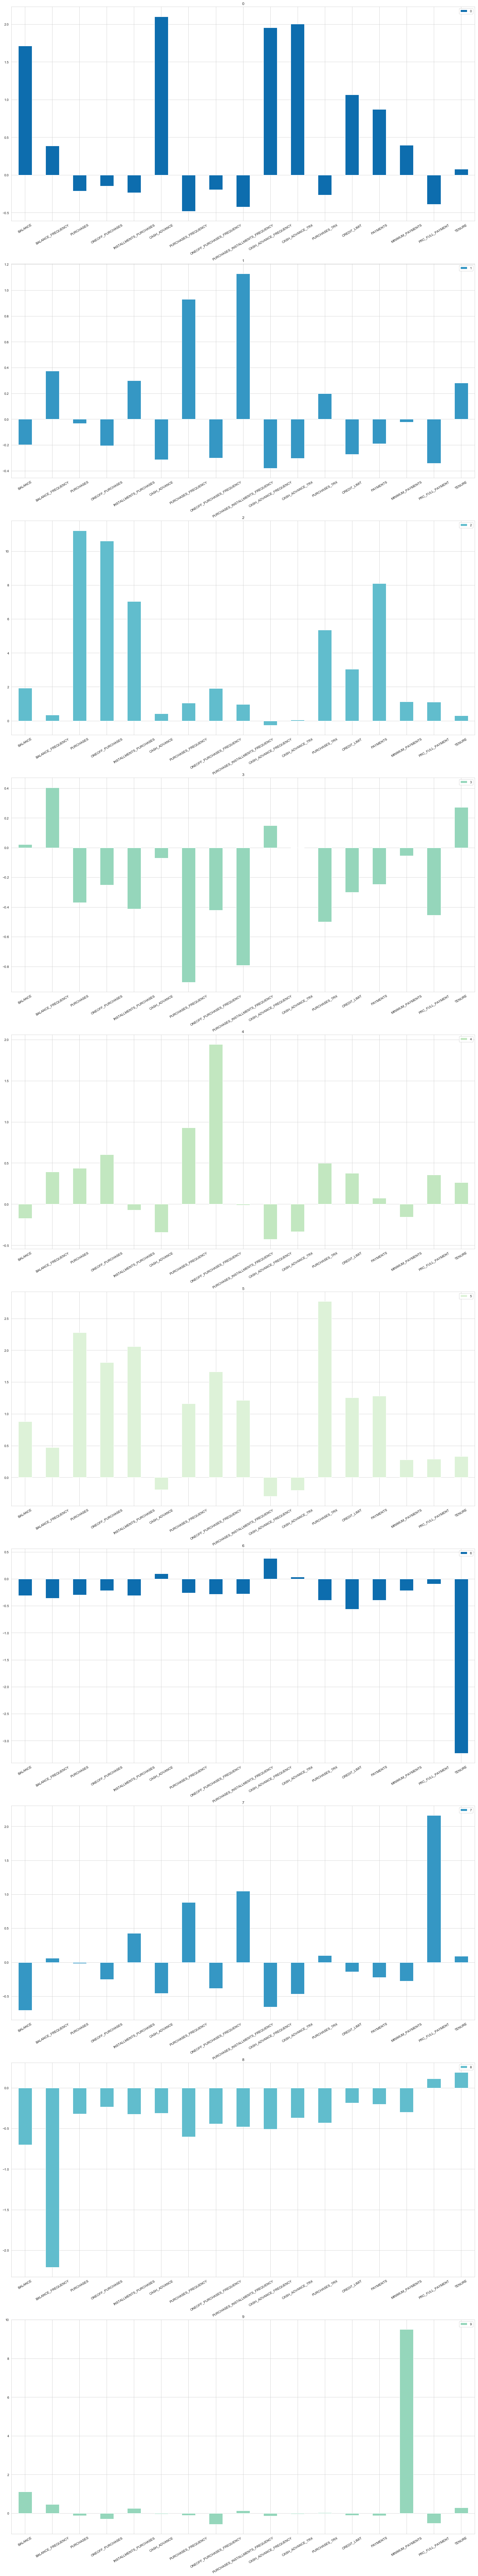

In [24]:
# Plotando um gráfico para ajudar na análise da característica de cada grupo
graf= modelo_treinado.T.plot.bar(subplots= True, figsize= (25, 140), sharex= False, rot= 30)

plt.show()

In [25]:
df_clusters= df.copy()

# Adicionando uma coluna com o grupo correspondente de cada cliente
df_clusters['CLUSTERS']= modelo.labels_

df_clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


In [29]:
# Agrupando por cluster e pegando a média de cada feature
df_clusters_agr= df_clusters.groupby('CLUSTERS')[df.columns].mean().round(2)

# Quantidade de clientes em cada grupo
df_clusters_agr['COUNT']= df_clusters.groupby('CLUSTERS')['BALANCE'].count()

df_clusters_agr

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,COUNT
CLUSTERS,,,,,,,,,,,,,,,,,,
0,5127.25,0.97,548.07,350.28,197.92,5387.82,0.30,0.14,0.20,0.52,16.91,8.19,8370.91,4262.17,1761.06,0.04,11.62,811
1,1155.66,0.97,932.39,251.69,681.19,321.11,0.86,0.11,0.81,0.06,1.19,19.66,3504.92,1182.76,784.46,0.05,11.89,1626
2,5567.14,0.96,24957.90,18186.88,6771.03,1858.84,0.91,0.77,0.75,0.08,3.67,148.00,15570.00,25178.88,3475.06,0.48,11.93,30
3,1611.37,0.97,212.05,174.46,37.76,832.51,0.13,0.08,0.05,0.16,3.24,2.31,3404.49,1021.66,706.36,0.02,11.88,2609
4,1206.36,0.97,1942.50,1594.04,348.51,261.60,0.86,0.78,0.36,0.05,0.96,27.05,5868.00,1944.50,465.16,0.26,11.87,996
5,3394.04,0.99,5866.83,3596.69,2271.55,583.49,0.96,0.70,0.85,0.08,1.86,83.50,9063.88,5447.55,1491.73,0.24,11.96,425
6,921.28,0.79,365.44,235.32,130.62,1185.17,0.39,0.12,0.25,0.21,3.48,4.83,2455.13,592.60,331.87,0.13,7.20,599
7,98.50,0.89,968.64,170.95,797.82,21.98,0.84,0.09,0.78,0.00,0.07,17.23,3992.16,1091.12,185.86,0.79,11.64,695
8,108.72,0.35,322.23,205.16,117.33,324.69,0.25,0.07,0.17,0.03,0.74,4.00,3821.51,1150.14,130.84,0.19,11.77,1105


## Análise

De acordo com as métricas análisadas, agrupamos os clientes em 10 grupos nos quais possuem caracteristicas diferentes.

### Grupo 0

- São 811 clientes que possuem alto saldo em conta que pode ser explicado por que pegam muito dinheiro adiantado e que gastam esse dinheiro adiantado com frequência.

### Grupo 1

- São 1626 cLientes que fazem fazem um grande volume de compras e na maioria em compras parceladas.

### Grupo 2

- São 30 clientes que fazem uma grande quantidade de compras, muitas compras à vista e o valor pago é alto.

### Grupo 3

- São 2609 clientes que não possuem muito saldo em conta e que quase não mexem na conta do banco.

### Grupo 4

- São 996 clientes que fazem um grande volume de compras, com grande volume de pagamentos à vista.

### Grupo 5

- São 425 clientes que fazem alta quantidade de compras e alto número de compras. A quantidade de compras é a quantidade de produtos comprados e o número de compras é o número de vezes que o cliente fecha uma compra(que podem ter x quantidades de produtos).

### Grupo 6

- São 599 clientes que não possuem a posse do cartão por muito tempo.

### Grupo 7

- São 695 clientes que não possuem muito dinheiro em conta mas que pagam toda a parcela da fatura, pagam parcelado e não pegam dinheiro adiantado.

### Grupo 8

- São 1105 clientes que pouco mexem na conta do cartão. 

### Grupo 9

- São 54 clientes que possuem o valor mínimo de compras alto.